# QUORA QUESTION PAIR
Find if two questions are duplicate or not.

In [153]:
data_set_loc = "D:/C-Drive Project's Datasets/quora-question-pair/train.csv"

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
df = pd.read_csv(data_set_loc)

In [156]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [157]:
df.shape

(404290, 6)

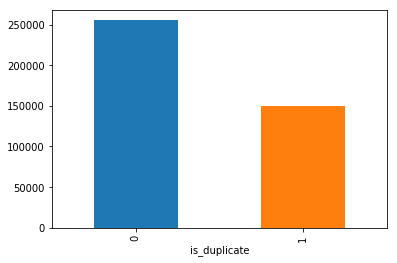

In [158]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [159]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [160]:
df = df.dropna(how='any',axis=0) 

In [161]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [162]:
df.shape

(404287, 6)

In [163]:
X = df[['id','question1', 'question2']]


In [164]:
X.head()

,id,question1,question2
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [165]:
y = df['is_duplicate']

In [166]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_duplicate, dtype: int64

In [167]:
from wordcloud import WordCloud

In [168]:
cloud1 = WordCloud(width=1280, height=980).generate(" ".join(df['question1'].astype(str)))
cloud2 = WordCloud(width=1280, height=980).generate(" ".join(df['question2'].astype(str)))

(-0.5, 1279.5, 979.5, -0.5)

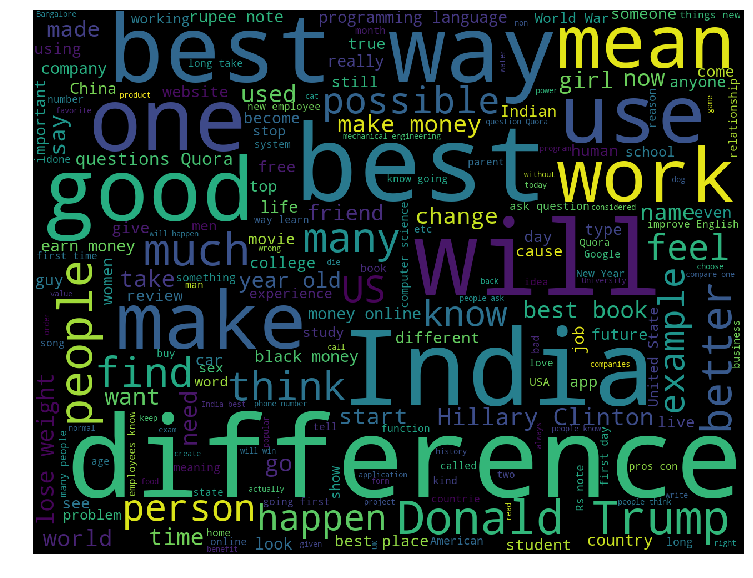

In [169]:
plt.figure(figsize=(15, 10))
plt.imshow(cloud1)
plt.axis('off')

(-0.5, 1279.5, 979.5, -0.5)

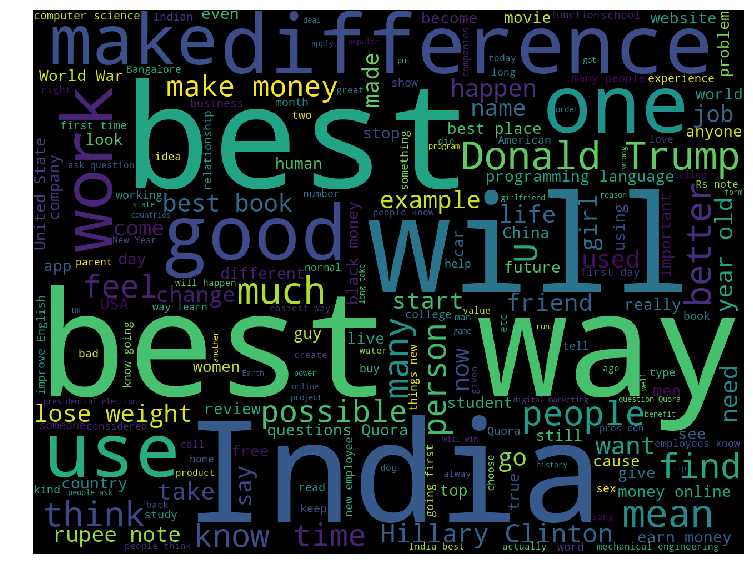

In [170]:
plt.figure(figsize=(15, 10))
plt.imshow(cloud2)
plt.axis('off')

In [171]:
import nltk 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [172]:
STOP_WORDS = set(stopwords.words('english'))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

In [173]:
def preprocess_text(text):
#     print(text,"\n")
    text = text.lower()
    text = re.sub(REPLACE_BY_SPACE_RE, " ", text)
    text = re.sub(BAD_SYMBOLS_RE, "", text)
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in STOP_WORDS]
    return text
    

In [174]:
X['question1'] = X['question1'].apply(preprocess_text)

C:\Users\bpakh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [175]:
X['question2'] = X['question2'].apply(preprocess_text)

C:\Users\bpakh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
X.head()

,id,question1,question2
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...
2,2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is...
4,4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water


In [178]:
print("X_train shape: ", X_train.shape, "\nX_test shape: ", X_test.shape,"\nY_train shape:

X_train shape:  (323429, 3) 
X_test shape:  (80858, 3) 
Y_train shape:  (323429,) 
Y_test shape:  (80858,)


Calculating words shared between two questions.

In [199]:
from collections import Counter
train_questions = pd.Series(X['question1'].tolist() + X['question2'].tolist()).astype(str)
test_questions = pd.Series(X['question1'].tolist() + X['question2'].tolist()).astype(str)
def get_weight(count, eps=5000, min_count=2):
    if count < min_count:
        return 0
    else:
        R = 1.0 / (count + eps)
        return R

eps = 5000 
words = (" ".join(train_questions)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}
print ("Most common words: ", (sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10]))

Most common words:  [('the', 2.613921221642222e-06), ('what', 3.15981723617106e-06), ('is', 3.6384673320210594e-06), ('how', 4.43449147469014e-06), ('i', 4.55605773436361e-06), ('a', 4.625710624794734e-06), ('to', 4.7506840985101855e-06), ('in', 4.961744946462772e-06), ('do', 6.024894865584596e-06), ('of', 6.067335287015296e-06)]


In [200]:
def tfidf_word_share(X):
    words_ques_1 = set(map(lambda word: word.lower().strip(), str(X['question1']).split(" ")))
    words_ques_2 = set(map(lambda word: word.lower().strip(), str(X['question2']).split(" ")))
    if len( words_ques_1)==0 or len( words_ques_2)==0:
        return 0
    common =  words_ques_1 &  words_ques_2
    share_weight = [weights.get(word, 0) for word in common]
    total_weight = [weights.get(word, 0) for word in  words_ques_1]+[weights.get(word, 0) for word in  words_ques_2]
    return np.sum(share_weight)/np.sum(total_weight)

In [196]:
# X_train['question1']

In [210]:
X['tfidf_word_share'] = X.apply(tfidf_word_share, axis = 1, raw = True)

Finding cosine similarity

In [122]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
tfidf_vectorizer = TfidfVectorizer(stop_words=STOP_WORDS)
tfidf_matrix = tfidf_vectorizer.fit(df.question1.values + df.question1.values)

In [128]:
def get_cosine_similarity(df):
    tfidf_matrix_transform1 = tfidf_vectorizer.transform(df.question1.values)
    tfidf_matrix_transform2 = tfidf_vectorizer.transform(df.question2.values)
    cos = []
    for i in range(len(df)):
        cos.append(cosine_similarity(tfidf_matrix_transform1[i].toarray(),\
                                     tfidf_matrix_transform2[i].toarray()))

    df['cosine_similarity'] = cos
    df['cosine_similarity'] = df.cosine_similarity.apply(lambda x: x[0][0])

In [202]:
get_cosine_similarity(X)

C:\Users\bpakh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bpakh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5,1,'Cosine_Similarity Difference Between Two Classes Of Train Set')

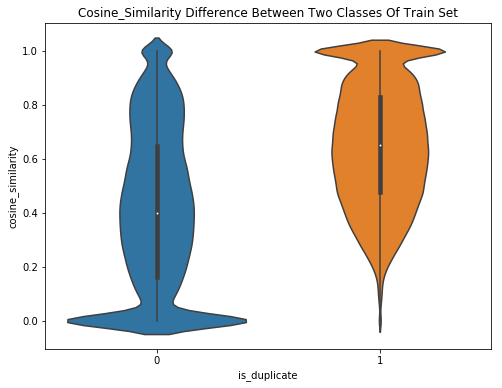

In [204]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.violinplot(x=y, y=X['cosine_similarity'])
plt.title('Cosine_Similarity Difference Between Two Classes Of Train Set')

In [206]:
processed_data = pd.DataFrame(dtype='float64')

In [208]:
X['q1chrlen'] = X['question1'].str.len()
X['q2chrlen'] = X['question2'].str.len()
X['q1_nword'] = X['question1'].apply(lambda x: len(str(x).split(" ")))
X['q2_nword'] = X['question2'].apply(lambda y: len(str(y).split(" ")))


In [213]:
X.head()

,id,question1,question2,cosine_similarity,q1chrlen,q2chrlen,q1_nword,q2_nword,tfidf_word_share
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0.981560,65,56,14,12,0.491647
1,1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0.791854,48,85,10,15,0.250643
2,2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0.275190,72,58,14,10,0.141572
3,3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is...,0.000000,48,63,11,17,0.000000
4,4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0.234579,75,38,15,7,0.131623


In [220]:
fX = X.drop(columns = ['id','question1','question2'])

In [222]:
fX.head()

,cosine_similarity,q1chrlen,q2chrlen,q1_nword,q2_nword,tfidf_word_share
0,0.981560,65,56,14,12,0.491647
1,0.791854,48,85,10,15,0.250643
2,0.275190,72,58,14,10,0.141572
3,0.000000,48,63,11,17,0.000000
4,0.234579,75,38,15,7,0.131623


In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fX,y,test_size=0.3)
print("X_train shape: ", X_train.shape, "\nX_test shape: ", X_test.shape,"\nY_train shape: ", y_train.shape, "\nY_test shape: ", y_test.shape)  

X_train shape:  (283000, 6) 
X_test shape:  (121287, 6) 
Y_train shape:  (283000,) 
Y_test shape:  (121287,)


# COMPARING VARIOUS SUPERVISED LEARNING MODELS 

In [238]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [239]:
random_forest.fit(X_train,y_train)
prediction = random_forest.predict_proba(X_test)

In [240]:
score_random_forest = random_forest.score(X_test, y_test)

In [248]:
score_random_forest

0.6945426962493919

In [250]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [251]:
dt = DecisionTreeClassifier(max_depth = 100, random_state=10)
dt.fit(X_train, y_train)
score_dt = dt.score(X_test, y_test)

In [252]:
score_dt

0.6616207837608318

In [254]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
score_nb = mnb.score(X_test,y_test)

In [255]:
score_nb

0.6464254206963648

In [ ]:
score_random_forest_searchCV = random_forest.score(X_test, y_test)

In [ ]:
score_random_forest_searchCV

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [264]:
from sklearn.model_selection import GridSearchCV

In [257]:
rfc_grid = {'max_depth': [3, 5],
            'n_estimators': [100, 300],
            'max_features': ['sqrt']}
rfc_gridsearch = GridSearchCV(RandomForestClassifier(),
                                 rfc_grid,
                                 n_jobs=-1,
                                 cv = 3,
                                 scoring='accuracy')
rfc_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5], 'n_estimators': [100, 300], 'max_features': ['sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [259]:
rfc_gridsearch.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}

In [265]:
rfc_gridsearch.best_score_

0.6820388692579505

In [266]:
from sklearn.ensemble import GradientBoostingClassifier

In [268]:
# Gradient Boosting Classifier Model
gbc_grid = {'learning_rate': [0.01,0.1],
            'n_estimators': [100, 300],
            'max_features': ['sqrt']}
gbc_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                                 gbc_grid,
                                 n_jobs=-1,
                                 verbose=True,)
gbc_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  2.3min remaining:   27.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1], 'n_estimators': [100, 300], 'max_features': ['sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [269]:
gbc_gridsearch.best_params_

{'learning_rate': 0.1, 'max_features': 'sqrt', 'n_estimators': 300}

In [270]:
gbc_gridsearch.best_score_

0.7028833922261484

In [271]:
gbc = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt', n_estimators=300)

In [272]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [273]:
gbc.score(X_test, y_test)

0.7035708690956162